# Assignment 5

1. Choose a regression dataset (bikeshare is allowed), perform a test/train split, and build a regression model (just like in assingnment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
2. Choose a classification dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In [709]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model


# #1 Regression Dataset - Obesity

In [710]:
# Regression Dataset

obesity = pd.read_csv('../data/ObesityDataSet_raw_and_data_sinthetic.csv', index_col=False)
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [711]:
# Convert Obesity Strings into Integers

obesity.NObeyesdad[obesity.NObeyesdad == 'Insufficient_Weight'] = 1
obesity.NObeyesdad[obesity.NObeyesdad == 'Normal_Weight'] = 1
obesity.NObeyesdad[obesity.NObeyesdad == 'Overweight_Level_I'] = 2
obesity.NObeyesdad[obesity.NObeyesdad == 'Overweight_Level_II'] = 3
obesity.NObeyesdad[obesity.NObeyesdad == 'Obesity_Type_I'] = 4
obesity.NObeyesdad[obesity.NObeyesdad == 'Obesity_Type_II'] = 5
obesity.NObeyesdad[obesity.NObeyesdad == 'Obesity_Type_III'] = 6

# Change Type Object to Type Numeric

pd.to_numeric(obesity.NObeyesdad)

/var/folders/gf/3459_gl932ldjkknblzk6jfr0000gn/T/ipykernel_49068/1918744680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity.NObeyesdad[obesity.NObeyesdad == 'Insufficient_Weight'] = 1
/var/folders/gf/3459_gl932ldjkknblzk6jfr0000gn/T/ipykernel_49068/1918744680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity.NObeyesdad[obesity.NObeyesdad == 'Normal_Weight'] = 1
/var/folders/gf/3459_gl932ldjkknblzk6jfr0000gn/T/ipykernel_49068/1918744680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

0       1
1       1
2       1
3       2
4       3
       ..
2106    6
2107    6
2108    6
2109    6
2110    6
Name: NObeyesdad, Length: 2111, dtype: int64

In [712]:
# Linear Regression

agex = np.reshape(np.array(obesity.Age),(-1, 1))

model = LinearRegression()
model.fit(agex, obesity.NObeyesdad)
model.coef_, model.intercept_

(array([0.07399857]), 1.442020311441876)

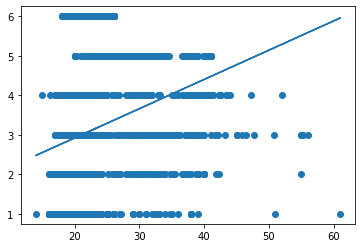

In [713]:
# Plot Data and Linear Regression

plt.scatter(agex, obesity.NObeyesdad)
plt.plot(agex, np.dot(agex, model.coef_) + model.intercept_)

In [714]:
# Create Train and Test Datasets

from sklearn.model_selection import train_test_split

non_numeric_columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
obesitynew = obesity.copy().drop(non_numeric_columns, axis=1)

x_train, x_test, y_train, y_test = train_test_split(obesitynew.drop(["NObeyesdad"], axis=1), obesitynew.NObeyesdad, test_size=.4)

x_trainx = np.reshape(np.array(x_train.Age),(-1, 1))
x_testx = np.reshape(np.array(x_test.Age),(-1, 1))


### Regression Dataset Plot - Train vs. Test

In [715]:
# Train Linear Regression

model = LinearRegression()
model.fit(x_trainx, y_train)
model.coef_, model.intercept_

(array([0.07419486]), 1.4750893701361272)

Text(0.5, 0, 'Age')

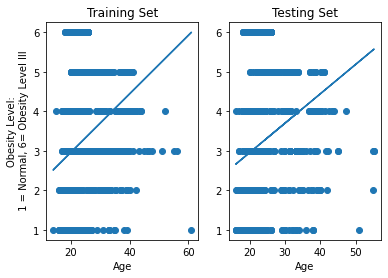

In [716]:
plt.subplot(1, 2, 1)
plt.scatter(x_trainx, y_train)
plt.plot(x_trainx, np.dot(x_trainx, model.coef_) + model.intercept_)
plt.title("Training Set")
plt.ylabel("Obesity Level:\n 1 = Normal, 6= Obesity Level III")
plt.xlabel("Age")

plt.subplot(1, 2, 2)
plt.scatter(x_testx, y_test)
plt.plot(x_testx, np.dot(x_testx, model.coef_) + model.intercept_)
plt.title("Testing Set")
plt.xlabel("Age")

### Regression Dataset - Error Values

In [717]:
# Train Mean Squared Error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Train Dataset Mean Squared Error =", mean_squared_error(y_train, np.dot(x_trainx, model.coef_) + model.intercept_), "\n")
print("Train Dataset Mean Absolute Error =", mean_absolute_error(y_train, np.dot(x_trainx, model.coef_) + model.intercept_), "\n")
print("Test Dataset Mean Squared Error =", mean_squared_error(y_test, np.dot(x_testx, model.coef_) + model.intercept_), "\n")
print("Test Dataset Mean Absolute Error =", mean_squared_error(y_test, np.dot(x_testx, model.coef_) + model.intercept_))

Train Dataset Mean Squared Error = 3.053808356431617 

Train Dataset Mean Absolute Error = 1.5397098952713182 

Test Dataset Mean Squared Error = 2.9939461295340566 

Test Dataset Mean Absolute Error = 2.9939461295340566


# #2 Classification Dataset - Predicting Credit Card Default

In [718]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

default = pd.read_excel("../data/default of credit card clients.xlsx", index_col=False)
default.rename(columns={'default payment next month': 'DEFAULT_PAY'}, inplace=True)

default

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [719]:
x_train, x_test, y_train, y_test = train_test_split(default.drop(['DEFAULT_PAY', "ID"], axis=1),default.DEFAULT_PAY, test_size=.5)


In [720]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [721]:
test_predictions = model.predict(x_test)

## Model Tests

In [722]:
print("Model Accuracy Score =", accuracy_score(y_test, test_predictions), "\n")
print("Model Confusion Matrix = \n", confusion_matrix(y_test, test_predictions), "\n")
print("Model Classification Report = \n", classification_report(y_test, test_predictions))

Model Accuracy Score = 0.7244666666666667 

Model Confusion Matrix = 
 [[9562 2102]
 [2031 1305]] 

Model Classification Report = 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82     11664
           1       0.38      0.39      0.39      3336

    accuracy                           0.72     15000
   macro avg       0.60      0.61      0.60     15000
weighted avg       0.73      0.72      0.73     15000



## Model Improvement #1: Drop Low-Importance Variables

In [723]:
list(zip(default.drop(['DEFAULT_PAY', "ID"], axis=1).columns, model.feature_importances_))

[('LIMIT_BAL', 0.06030312209792029),
 ('SEX', 0.012934612012574058),
 ('EDUCATION', 0.025146698834902465),
 ('MARRIAGE', 0.016926079260518232),
 ('AGE', 0.07521733681018554),
 ('PAY_0', 0.12168586840242278),
 ('PAY_2', 0.029965942850384335),
 ('PAY_3', 0.009430998486218877),
 ('PAY_4', 0.012700523246226817),
 ('PAY_5', 0.011920415861824386),
 ('PAY_6', 0.014352490706942377),
 ('BILL_AMT1', 0.07189834156293189),
 ('BILL_AMT2', 0.04226587635605009),
 ('BILL_AMT3', 0.05473475079792444),
 ('BILL_AMT4', 0.0385765316306678),
 ('BILL_AMT5', 0.05150461043599946),
 ('BILL_AMT6', 0.04429711697453997),
 ('PAY_AMT1', 0.04534803626393785),
 ('PAY_AMT2', 0.04534781012036834),
 ('PAY_AMT3', 0.06108030433726735),
 ('PAY_AMT4', 0.04922547269053317),
 ('PAY_AMT5', 0.049570619534291295),
 ('PAY_AMT6', 0.055566440725368246)]

In [724]:
x_train, x_test, y_train, y_test = train_test_split(default.drop(['DEFAULT_PAY', "SEX", "EDUCATION", "MARRIAGE", "ID", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"], axis=1),default.DEFAULT_PAY, test_size=.5)

In [725]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [726]:
test_predictions = model.predict(x_test)

## Model Improvement Test #1

In [727]:
print("Model Accuracy Score =", accuracy_score(y_test, test_predictions), "\n")
print("Model Confusion Matrix = \n", confusion_matrix(y_test, test_predictions), "\n")
print("Model Classification Report = \n", classification_report(y_test, test_predictions))

Model Accuracy Score = 0.7782 

Model Confusion Matrix = 
 [[10705   979]
 [ 2348   968]] 

Model Classification Report = 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87     11684
           1       0.50      0.29      0.37      3316

    accuracy                           0.78     15000
   macro avg       0.66      0.60      0.62     15000
weighted avg       0.75      0.78      0.76     15000



## Model Improvement #2: Use Only Most-Important Variable

In [728]:
x_train, x_test, y_train, y_test = train_test_split(default.drop(['DEFAULT_PAY', "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "ID", "AGE", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"], axis=1),default.DEFAULT_PAY, test_size=.5)

In [729]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [730]:
test_predictions = model.predict(x_test)

## Model Improvement Test #2

In [731]:
print("Model Accuracy Score =", accuracy_score(y_test, test_predictions), "\n")
print("Model Confusion Matrix = \n", confusion_matrix(y_test, test_predictions), "\n")
print("Model Classification Report = \n", classification_report(y_test, test_predictions))

Model Accuracy Score = 0.8182 

Model Confusion Matrix = 
 [[11199   469]
 [ 2258  1074]] 

Model Classification Report = 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     11668
           1       0.70      0.32      0.44      3332

    accuracy                           0.82     15000
   macro avg       0.76      0.64      0.67     15000
weighted avg       0.80      0.82      0.79     15000

